In [7]:
import lpips
import os
import cv2

def LPIPS_analyze(clean_image_path, dirty_image_path):
    loss_fn_alex = lpips.LPIPS(net='alex')
    for file in os.listdir(clean_image_path):
        print(f"Processing file: {file}")
        
        clean_image_full_path = os.path.join(clean_image_path, file)
        dirty_image_full_path = os.path.join(dirty_image_path, file)
        
        print(f"Clean image path: {clean_image_full_path}")
        print(f"Dirty image path: {dirty_image_full_path}")
        
        if not os.path.exists(clean_image_full_path):
            print(f"Clean image file does not exist: {clean_image_full_path}")
            continue
        
        if not os.path.exists(dirty_image_full_path):
            print(f"Dirty image file does not exist: {dirty_image_full_path}")
            continue
        
        clean_image = lpips.load_image(clean_image_full_path)
        dirty_image = lpips.load_image(dirty_image_full_path)
        
        if clean_image is None:
            print(f"Error loading clean image: {clean_image_full_path}")
            continue
        
        if dirty_image is None:
            print(f"Error loading dirty image: {dirty_image_full_path}")
            continue
        
        clean_image_tensor = lpips.im2tensor(clean_image)
        dirty_image_tensor = lpips.im2tensor(dirty_image)
        
        LPIPS_value = loss_fn_alex(clean_image_tensor, dirty_image_tensor)
        print(f"LPIPS value for {file}: {LPIPS_value.item()}")

# Pfade zu den Bildverzeichnissen
clean_image_path = r'/home/vincent/Simularity_evaluate/Binarized/'
dirty_image_path = r'/home/vincent/Simularity_evaluate/Original/'

LPIPS_analyze(clean_image_path, dirty_image_path)



Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/home/vincent/anaconda3/envs/simularity_evaluate/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/vincent/anaconda3/envs/simularity_evaluate/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /home/vincent/anaconda3/envs/simularity_evaluate/lib/python3.11/site-packages/lpips/weights/v0.1/alex.pth
Processing file: 107-1.png
Clean image path: /home/vincent/Simularity_evaluate/Binarized/107-1.png
Dirty image path: /home/vincent/Simularity_evaluate/Original/107-1.png
LPIPS value for 107-1.png: 0.162383034825325
Processing file: 107-2.png
Clean image path: /home/vincent/Simularity_evaluate/Binarized/107-2.png
Dirty image path: /home/vincent/Simularity_evaluate/Original/107-2.png
LPIPS value for 107-2.png: 0.2317749410867691
Processing file: 107-3.png
Clean image path: /home/vincent/Simularity_evaluate/Binarized/107-3.png
Dirty image path: /home/vincent/Simularity_evaluate/Original/107-3.png
LPIPS value for 107-3.png: 0.2191411554813385
Processing file: 107-4.png
Clean image path: /home/vincent/Simularity_evaluate/Binarized/107-4.png
Dirty image path: /home/vincent/Simularity_evaluate/Original/107-4.png
LPIPS value for 107-4.png: 0.2119862288236618
Processing 

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /home/vincent/anaconda3/envs/simularity_evaluate/lib/python3.11/site-packages/lpips/weights/v0.1/alex.pth
Processing file: 107-1.png
LPIPS value for 107-1.png: 0.162383034825325
Processing file: 107-2.png
LPIPS value for 107-2.png: 0.2317749410867691
Processing file: 107-3.png
LPIPS value for 107-3.png: 0.2191411554813385
Processing file: 107-4.png
LPIPS value for 107-4.png: 0.2119862288236618
Processing file: 2.png
LPIPS value for 2.png: 0.7963018417358398
Processing file: 254201_2962_1__Nachtrag_I-images-0.png
LPIPS value for 254201_2962_1__Nachtrag_I-images-0.png: 0.07920993119478226
Processing file: 254271_865__Nachtrag_I.png
LPIPS value for 254271_865__Nachtrag_I.png: 0.22941027581691742
Processing file: 320614_4252__Nachtrag_I-images-0.png
LPIPS value for 320614_4252__Nachtrag_I-images-0.png: 0.1452430933713913
Processing file: augmented_image_1.jpg
LPIPS value for augmented_image_1.jpg: 0

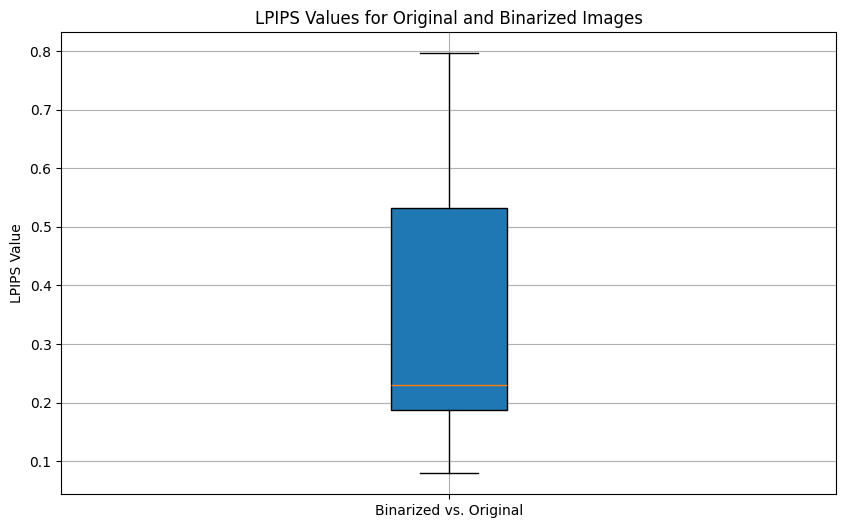

In [8]:
import matplotlib.pyplot as plt

def LPIPS_analyze_and_plot(clean_image_path, dirty_image_path):
    loss_fn_alex = lpips.LPIPS(net='alex')
    lpips_values = []

    for file in os.listdir(clean_image_path):
        print(f"Processing file: {file}")
        
        clean_image_full_path = os.path.join(clean_image_path, file)
        dirty_image_full_path = os.path.join(dirty_image_path, file)
        
        if not os.path.exists(clean_image_full_path):
            print(f"Clean image file does not exist: {clean_image_full_path}")
            continue
        
        if not os.path.exists(dirty_image_full_path):
            print(f"Dirty image file does not exist: {dirty_image_full_path}")
            continue
        
        clean_image = lpips.load_image(clean_image_full_path)
        dirty_image = lpips.load_image(dirty_image_full_path)
        
        if clean_image is None:
            print(f"Error loading clean image: {clean_image_full_path}")
            continue
        
        if dirty_image is None:
            print(f"Error loading dirty image: {dirty_image_full_path}")
            continue
        
        clean_image_tensor = lpips.im2tensor(clean_image)
        dirty_image_tensor = lpips.im2tensor(dirty_image)
        
        LPIPS_value = loss_fn_alex(clean_image_tensor, dirty_image_tensor)
        lpips_values.append(LPIPS_value.item())
        print(f"LPIPS value for {file}: {LPIPS_value.item()}")
    
    # Boxplot erstellen
    plt.figure(figsize=(10, 6))
    plt.boxplot(lpips_values, vert=True, patch_artist=True)
    plt.title('LPIPS Values for Original and Binarized Images')
    plt.ylabel('LPIPS Value')
    plt.xticks([1], ['Binarized vs. Original'])
    plt.grid(True)
    plt.show()

# Pfade zu den Bildverzeichnissen
clean_image_path = r'/home/vincent/Simularity_evaluate/Binarized/'
dirty_image_path = r'/home/vincent/Simularity_evaluate/Original/'

LPIPS_analyze_and_plot(clean_image_path, dirty_image_path)
